In [93]:
# Dependencies
import requests
import json
from xml.etree import ElementTree as ET
import pandas as pd
import csv
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import linregress
import plotly.graph_objects as go

In [94]:
# OECD data API documentation: https://gitlab.algobank.oecd.org/public-documentation/dotstat-migration/-/raw/main/OECD_Data_API_documentation.pdf
# Query URL with all parameters is provided in whole by the OECD Data Explorer https://data-explorer.oecd.org/
# No API key is needed
url = "https://sdmx.oecd.org/public/rest/data/OECD.ELS.HD,DSD_SHA@DF_SHA,1.0/.A.EXP_HEALTH.PT_B1GQ._T.._T.._T...?startPeriod=1970&endPeriod=2023&dimensionAtObservation=AllDimensions"

In [95]:
# Pass the API URL to the get function. Include headers to specify csv
#headers = {"Accept": "application/vnd.sdmx.data+csv; charset=utf-8"}
# Define the headers
headers = {
    'Accept': 'application/vnd.sdmx.data+json; charset=utf-8; version=1.0'
}

response = requests.get(url, headers=headers)
#response = requests.get(url)
print(response.status_code)

200


In [96]:
# Check if the request was successful
if response.status_code == 200:
    # Print the raw response content to inspect
    print("Response Content:")
    print(response.content[:500])  # Print the first 500 characters to inspect
    
    # Check the Content-Type header
    content_type = response.headers.get('Content-Type')
    print("Content-Type:", content_type)
    
    # If the response is JSON, parse it
    if 'application/vnd.sdmx.data+json' in content_type:
        data = response.json()
        print(data)
    else:
        print("Response is not in JSON format.")
else:
    print('Failed to retrieve data. Status code:', response.status_code)
    print("Response Content:")
    print(response.content)

Response Content:
b'{"meta":{"schema":"https://raw.githubusercontent.com/sdmx-twg/sdmx-json/master/data-message/tools/schemas/1.0/sdmx-json-data-schema.json","id":"IREF037443","prepared":"2024-07-15T01:43:01Z","test":true,"contentLanguages":["en","en-US"],"sender":{"id":"Disseminate_Final_DMZ","name":"unknown","names":{"en-US":"unknown"}}},"data":{"dataSets":[{"action":"Information","links":[{"urn":"urn:sdmx:org.sdmx.infomodel.datastructure.DataStructure=OECD.ELS.HD:DSD_SHA(1.0)","rel":"DataStructure"}],"annotation'
Content-Type: application/vnd.sdmx.data+json; version=1.0; charset=utf-8
{'meta': {'schema': 'https://raw.githubusercontent.com/sdmx-twg/sdmx-json/master/data-message/tools/schemas/1.0/sdmx-json-data-schema.json', 'id': 'IREF037443', 'prepared': '2024-07-15T01:43:01Z', 'test': True, 'contentLanguages': ['en', 'en-US'], 'sender': {'id': 'Disseminate_Final_DMZ', 'name': 'unknown', 'names': {'en-US': 'unknown'}}}, 'data': {'dataSets': [{'action': 'Information', 'links': [{'urn

In [97]:
# Parse the JSON response content
data = json.loads(response.content.decode('utf-8'))

# Extract the necessary information
observations = data['data']['dataSets'][0]['observations']
dimensions = data['data']['structure']['dimensions']['observation']

# Extract dimension names for easier access
dim_values = {dim['id']: dim['values'] for dim in dimensions}

# Open a CSV file for writing
with open('output.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)

    # Write the header row
    header = ['Reference Area', 'Measure', 'Unit of Measure', 'Time Period', 'Observation Value']
    csvwriter.writerow(header)

    # Write the data rows
    for key, value in observations.items():
        dim_indices = key.split(':')
        row = [
            dim_values['REF_AREA'][int(dim_indices[0])]['name'],  # Reference Area
            dim_values['MEASURE'][int(dim_indices[1])]['name'],   # Measure
            dim_values['UNIT_MEASURE'][int(dim_indices[2])]['name'],      # Unit of Measure
            dim_values['TIME_PERIOD'][int(dim_indices[-1])]['id'], # Time Period (assuming the last index for TIME_PERIOD)
            value[0]  # Observation Value
        ]      
        csvwriter.writerow(row)

print("Data has been written to output.csv")

Data has been written to output.csv


In [98]:
# Display the data
life_expectancy = Path("Resources/Life_Expectancy_UNData.csv")
life_expectancy_df = pd.read_csv(life_expectancy)
health_file = Path("output.csv")
health_file_df = pd.read_csv(health_file)
display(life_expectancy_df)
display(health_file_df)

/var/folders/q2/v8zk8rk54691thc1c5rrpbjm0000gn/T/ipykernel_2619/1419290885.py:3: DtypeWarning: Columns (3,15,16,17,19,21,25,26,27,28,29,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,64) have mixed types. Specify dtype option on import or set low_memory=False.
  life_expectancy_df = pd.read_csv(life_expectancy)


,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,581,498,240,272,208,379,430,325,0,0
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,567,490,231,258,204,368,416,319,0,0
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,546,477,219,240,197,353,396,310,0,0
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,536,470,213,233,193,345,386,304,0,0
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,523,458,206,224,187,335,375,296,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,20592,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,92,103,31,27,34,83,82,83,- 0,-16.7
20592,20593,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,99,89,29,29,29,80,89,72,- 0,-14.4
20593,20594,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,78,80,24,22,26,67,69,64,- 0,-14.5
20594,20595,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,86,86,27,25,28,73,76,70,- 0,-7.1


,Reference Area,Measure,Unit of Measure,Time Period,Observation Value
0,Brazil,Expenditure,Percentage of GDP,2005,8.035
1,India,Expenditure,Percentage of GDP,2003,4.134
2,India,Expenditure,Percentage of GDP,2002,4.373
3,Belgium,Expenditure,Percentage of GDP,2013,10.575
4,India,Expenditure,Percentage of GDP,2009,3.594
...,...,...,...,...,...
1856,Brazil,Expenditure,Percentage of GDP,2010,7.945
1857,Brazil,Expenditure,Percentage of GDP,2009,8.395
1858,Brazil,Expenditure,Percentage of GDP,2008,8.011
1859,Brazil,Expenditure,Percentage of GDP,2007,8.202


In [99]:
# Clean the data

# Strip whitespace from column titles
life_expectancy_df.columns = life_expectancy_df.columns.str.strip()
health_file_df.columns = health_file_df.columns.str.strip()

# Rename useful columns before merging
renamed_df = life_expectancy_df.rename(columns={"Region, subregion, country or area *":"Reference Area", "Year":"Time Period"})
renamed_df.head()

# Manual mapping dictionary to match names of few countries between both files
country_mapping = {
    "United States": "United States of America",
    "T√ºrkiye": "Türkiye",
    "China (People‚Äôs Republic of)": "China",
    "Slovak Republic": "Slovakia"
}
# Standardize country names in gdp file
health_file_df['Reference Area'] = health_file_df['Reference Area'].replace(country_mapping)

# Merging Life Expentamcy and GDP file on Country and Year
combined_df = pd.merge(renamed_df, health_file_df, on=["Reference Area","Time Period"] , how="left") 
combined_df

,Index,Variant,Reference Area,Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",Measure,Unit of Measure,Observation Value
0,1,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,272,208,379,430,325,0,0,NaN,NaN,NaN
1,2,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,258,204,368,416,319,0,0,NaN,NaN,NaN
2,3,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,240,197,353,396,310,0,0,NaN,NaN,NaN
3,4,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,233,193,345,386,304,0,0,NaN,NaN,NaN
4,5,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,224,187,335,375,296,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20591,20592,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,27,34,83,82,83,- 0,-16.7,NaN,NaN,NaN
20592,20593,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,29,29,80,89,72,- 0,-14.4,NaN,NaN,NaN
20593,20594,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,22,26,67,69,64,- 0,-14.5,NaN,NaN,NaN
20594,20595,Estimates,Wallis and Futuna Islands,2.0,876,WLF,WF,876.0,Country/Area,957,...,25,28,73,76,70,- 0,-7.1,NaN,NaN,NaN


In [100]:
# Remove the rows with missing values in GDP Per Capita
cleaned_df = combined_df.dropna(subset=['Observation Value'])
cleaned_df

,Index,Variant,Reference Area,Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)",Measure,Unit of Measure,Observation Value
4878,4879,Estimates,South Africa,NaN,710,ZAF,ZA,710.0,Country/Area,913,...,323,246,401,473,342,- 80,-1.7,Expenditure,Percentage of GDP,7.337
4879,4880,Estimates,South Africa,NaN,710,ZAF,ZA,710.0,Country/Area,913,...,339,274,424,490,370,- 30,-0.6,Expenditure,Percentage of GDP,7.123
4880,4881,Estimates,South Africa,NaN,710,ZAF,ZA,710.0,Country/Area,913,...,366,312,455,515,407,50,1.1,Expenditure,Percentage of GDP,6.678
4881,4882,Estimates,South Africa,NaN,710,ZAF,ZA,710.0,Country/Area,913,...,390,340,481,539,436,66,1.4,Expenditure,Percentage of GDP,7.041
4882,4883,Estimates,South Africa,NaN,710,ZAF,ZA,710.0,Country/Area,913,...,397,357,492,544,454,59,1.2,Expenditure,Percentage of GDP,6.938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,18864,Estimates,New Zealand,33.0,554,NZL,NZ,554.0,Country/Area,927,...,39,23,67,82,53,49,10.3,Expenditure,Percentage of GDP,8.970
18864,18865,Estimates,New Zealand,33.0,554,NZL,NZ,554.0,Country/Area,927,...,39,23,67,81,53,80,16.8,Expenditure,Percentage of GDP,9.038
18865,18866,Estimates,New Zealand,33.0,554,NZL,NZ,554.0,Country/Area,927,...,39,23,67,81,53,103,21.1,Expenditure,Percentage of GDP,9.072
18866,18867,Estimates,New Zealand,33.0,554,NZL,NZ,554.0,Country/Area,927,...,39,22,65,79,52,38,7.6,Expenditure,Percentage of GDP,9.732


In [101]:
# Only copy colums which are needed for the analysis
clean_df = cleaned_df[["Reference Area", "Time Period", "Total Population, as of 1 July (thousands)", 
"Life Expectancy at Birth, both sexes (years)", "Male Life Expectancy at Birth (years)", "Female Life Expectancy at Birth (years)", "Observation Value"]].copy()

# Reset index
clean_df.reset_index(drop=True, inplace=True)

clean_df

,Reference Area,Time Period,"Total Population, as of 1 July (thousands)","Life Expectancy at Birth, both sexes (years)",Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Observation Value
0,South Africa,2000.0,46 813,58.5,55.4,61.0,7.337
1,South Africa,2001.0,47 230,57.3,54.6,59.5,7.123
2,South Africa,2002.0,47 662,55.7,53.2,57.7,6.678
3,South Africa,2003.0,48 104,54.3,52.0,56.2,7.041
4,South Africa,2004.0,48 556,54.0,51.9,55.7,6.938
...,...,...,...,...,...,...,...
1723,New Zealand,2017.0,4 746,82.2,80.4,84.0,8.970
1724,New Zealand,2018.0,4 839,82.4,80.5,84.2,9.038
1725,New Zealand,2019.0,4 959,82.6,80.7,84.4,9.072
1726,New Zealand,2020.0,5 061,82.7,80.9,84.6,9.732


In [102]:
#Show Data types to check if data types need to be changed
clean_df.dtypes

Reference Area                                   object
Time Period                                     float64
Total Population, as of 1 July (thousands)       object
Life Expectancy at Birth, both sexes (years)     object
Male Life Expectancy at Birth (years)            object
Female Life Expectancy at Birth (years)          object
Observation Value                               float64
dtype: object

In [103]:
clean_df['Time Period'] = clean_df['Time Period'].astype("int")

In [104]:

# Rename columns for convenience
selected_df = clean_df.rename(columns={"Life Expectancy at Birth, both sexes (years)":"Life Expectancy",
                                       "Total Population, as of 1 July (thousands)":"Population", 
                                       "Observation Value": "Health Expenditure"
                                   })
selected_df


,Reference Area,Time Period,Population,Life Expectancy,Male Life Expectancy at Birth (years),Female Life Expectancy at Birth (years),Health Expenditure
0,South Africa,2000,46 813,58.5,55.4,61.0,7.337
1,South Africa,2001,47 230,57.3,54.6,59.5,7.123
2,South Africa,2002,47 662,55.7,53.2,57.7,6.678
3,South Africa,2003,48 104,54.3,52.0,56.2,7.041
4,South Africa,2004,48 556,54.0,51.9,55.7,6.938
...,...,...,...,...,...,...,...
1723,New Zealand,2017,4 746,82.2,80.4,84.0,8.970
1724,New Zealand,2018,4 839,82.4,80.5,84.2,9.038
1725,New Zealand,2019,4 959,82.6,80.7,84.4,9.072
1726,New Zealand,2020,5 061,82.7,80.9,84.6,9.732


In [105]:
# Extract necessary columns

final_df = selected_df[['Reference Area', 'Time Period', 'Life Expectancy', 'Population', 'Health Expenditure']]
final_df.head()

,Reference Area,Time Period,Life Expectancy,Population,Health Expenditure
0,South Africa,2000,58.5,46 813,7.337
1,South Africa,2001,57.3,47 230,7.123
2,South Africa,2002,55.7,47 662,6.678
3,South Africa,2003,54.3,48 104,7.041
4,South Africa,2004,54.0,48 556,6.938


In [106]:
final_df['Population'] = final_df['Population'].str.replace(' ', '').astype(float)
final_df['Life Expectancy'] = final_df['Life Expectancy'].astype(float)
final_df

/var/folders/q2/v8zk8rk54691thc1c5rrpbjm0000gn/T/ipykernel_2619/1712271683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Population'] = final_df['Population'].str.replace(' ', '').astype(float)
/var/folders/q2/v8zk8rk54691thc1c5rrpbjm0000gn/T/ipykernel_2619/1712271683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Life Expectancy'] = final_df['Life Expectancy'].astype(float)


,Reference Area,Time Period,Life Expectancy,Population,Health Expenditure
0,South Africa,2000,58.5,46813.0,7.337
1,South Africa,2001,57.3,47230.0,7.123
2,South Africa,2002,55.7,47662.0,6.678
3,South Africa,2003,54.3,48104.0,7.041
4,South Africa,2004,54.0,48556.0,6.938
...,...,...,...,...,...
1723,New Zealand,2017,82.2,4746.0,8.970
1724,New Zealand,2018,82.4,4839.0,9.038
1725,New Zealand,2019,82.6,4959.0,9.072
1726,New Zealand,2020,82.7,5061.0,9.732


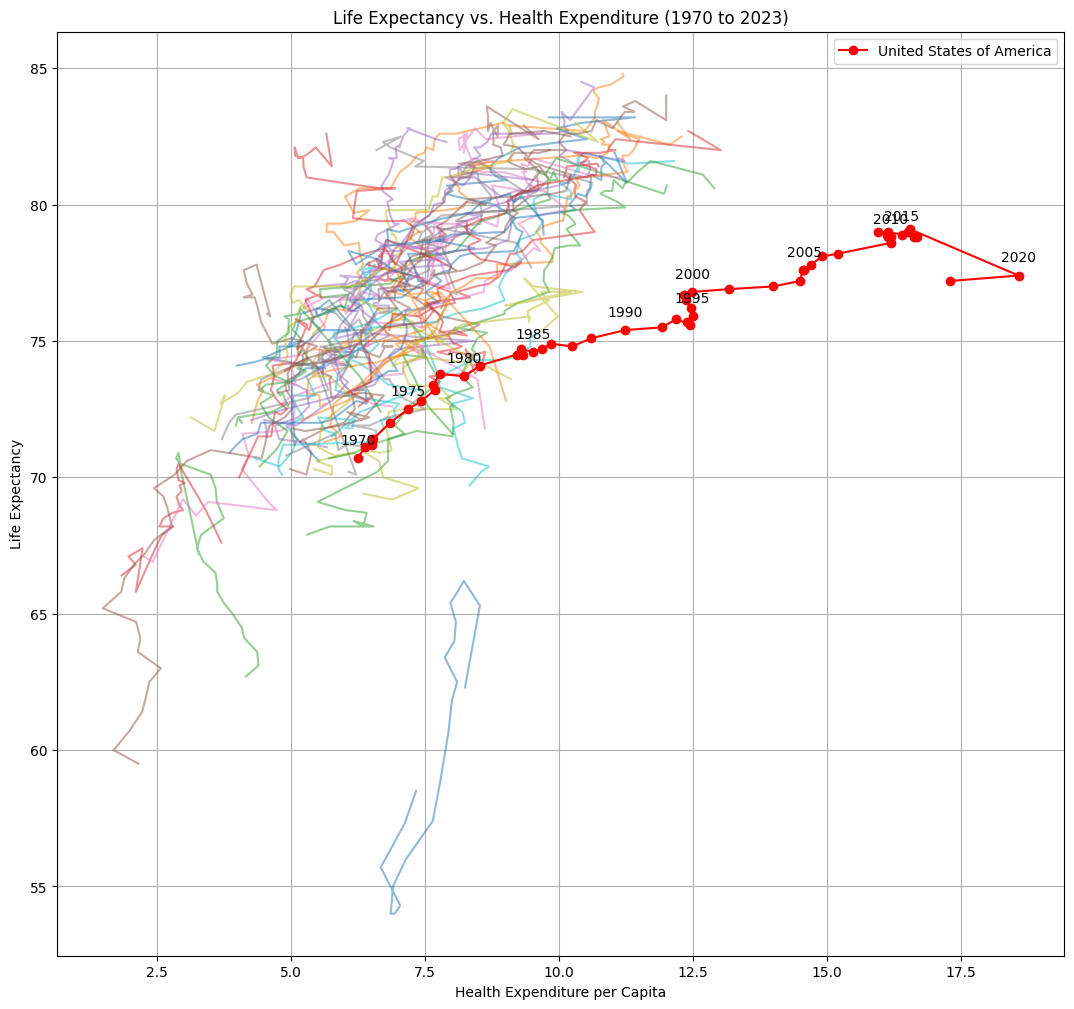

In [134]:
# Initialize the plot
plt.figure(figsize=(13, 12))

# List of countries to highlight (you can modify this as needed)
highlight_countries = ['United States of America']

# Plot data for each country
for country in final_df['Reference Area'].unique():
    country_data = final_df[final_df['Reference Area'] == country]
    if country in highlight_countries:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='red', marker='o')
        for i, row in country_data.iterrows():
            # Annotate every 5 years
            if int(row['Time Period']) % 5 == 0:  # Check if the year is a multiple of 5
                plt.annotate(row['Time Period'], (row['Health Expenditure'], row['Life Expectancy']), textcoords="offset points", xytext=(0,10), ha='center')
    else:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], alpha=0.5) #color='gray', )
    
# Set labels and title
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Life Expectancy')
plt.grid()
plt.title('Life Expectancy vs. Health Expenditure (1970 to 2023)')
plt.legend()

# Show the plot
plt.show()

In [108]:
# Display the data
life_expectancy_gdp = Path("Output/final_data.csv")
life_expectancy_gdp_df = pd.read_csv(life_expectancy_gdp)
health_file = Path("output.csv")
health_file_df = pd.read_csv(health_file)
display(life_expectancy_gdp_df)
display(health_file_df)

,Country,year,Life Expectancy,GDP per Capita,Region,Population
0,Burundi,1950,40.6,595.0,Sub Saharan Africa,2254.0
1,Burundi,1951,40.8,618.0,Sub Saharan Africa,2303.0
2,Burundi,1952,41.0,626.0,Sub Saharan Africa,2352.0
3,Burundi,1953,41.3,641.0,Sub Saharan Africa,2399.0
4,Burundi,1954,41.6,665.0,Sub Saharan Africa,2447.0
...,...,...,...,...,...,...
11060,New Zealand,2017,82.2,35574.0,Western Offshoots,4746.0
11061,New Zealand,2018,82.4,36420.0,Western Offshoots,4839.0
11062,New Zealand,2019,82.6,36912.0,Western Offshoots,4959.0
11063,New Zealand,2020,82.7,35854.0,Western Offshoots,5061.0


,Reference Area,Measure,Unit of Measure,Time Period,Observation Value
0,Brazil,Expenditure,Percentage of GDP,2005,8.035
1,India,Expenditure,Percentage of GDP,2003,4.134
2,India,Expenditure,Percentage of GDP,2002,4.373
3,Belgium,Expenditure,Percentage of GDP,2013,10.575
4,India,Expenditure,Percentage of GDP,2009,3.594
...,...,...,...,...,...
1856,Brazil,Expenditure,Percentage of GDP,2010,7.945
1857,Brazil,Expenditure,Percentage of GDP,2009,8.395
1858,Brazil,Expenditure,Percentage of GDP,2008,8.011
1859,Brazil,Expenditure,Percentage of GDP,2007,8.202


In [109]:
# Clean the data

# Strip whitespace from column titles
life_expectancy_gdp_df.columns = life_expectancy_gdp_df.columns.str.strip()
health_file_df.columns = health_file_df.columns.str.strip()

# Rename useful columns before merging
renamed_df = life_expectancy_gdp_df.rename(columns={"Country":"Reference Area", "year":"Time Period"})
renamed_df.head()

# Manual mapping dictionary to match names of few countries between both files
country_mapping = {
    "United States": "United States of America",
    "T√ºrkiye": "Türkiye",
    "China (People‚Äôs Republic of)": "China",
    "Slovak Republic": "Slovakia"
}
# Standardize country names in gdp file
health_file_df['Reference Area'] = health_file_df['Reference Area'].replace(country_mapping)

# Merging Life Expentamcy and GDP file on Country and Year
combo_df = pd.merge(renamed_df, health_file_df, on=["Reference Area","Time Period"] , how="left") 
combo_df

,Reference Area,Time Period,Life Expectancy,GDP per Capita,Region,Population,Measure,Unit of Measure,Observation Value
0,Burundi,1950,40.6,595.0,Sub Saharan Africa,2254.0,NaN,NaN,NaN
1,Burundi,1951,40.8,618.0,Sub Saharan Africa,2303.0,NaN,NaN,NaN
2,Burundi,1952,41.0,626.0,Sub Saharan Africa,2352.0,NaN,NaN,NaN
3,Burundi,1953,41.3,641.0,Sub Saharan Africa,2399.0,NaN,NaN,NaN
4,Burundi,1954,41.6,665.0,Sub Saharan Africa,2447.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
11060,New Zealand,2017,82.2,35574.0,Western Offshoots,4746.0,Expenditure,Percentage of GDP,8.970
11061,New Zealand,2018,82.4,36420.0,Western Offshoots,4839.0,Expenditure,Percentage of GDP,9.038
11062,New Zealand,2019,82.6,36912.0,Western Offshoots,4959.0,Expenditure,Percentage of GDP,9.072
11063,New Zealand,2020,82.7,35854.0,Western Offshoots,5061.0,Expenditure,Percentage of GDP,9.732


In [114]:
# Remove the rows with missing values in GDP Per Capita
clean_lexgdphealth_df = combo_df.dropna(subset=['Observation Value'])
clean_lexgdphealth_df

,Reference Area,Time Period,Life Expectancy,GDP per Capita,Region,Population,Measure,Unit of Measure,Observation Value
2354,South Africa,2000,58.5,7583.0,Sub Saharan Africa,46813.0,Expenditure,Percentage of GDP,7.337
2355,South Africa,2001,57.3,7840.0,Sub Saharan Africa,47230.0,Expenditure,Percentage of GDP,7.123
2356,South Africa,2002,55.7,8171.0,Sub Saharan Africa,47662.0,Expenditure,Percentage of GDP,6.678
2357,South Africa,2003,54.3,8451.0,Sub Saharan Africa,48104.0,Expenditure,Percentage of GDP,7.041
2358,South Africa,2004,54.0,8878.0,Sub Saharan Africa,48556.0,Expenditure,Percentage of GDP,6.938
...,...,...,...,...,...,...,...,...,...
11060,New Zealand,2017,82.2,35574.0,Western Offshoots,4746.0,Expenditure,Percentage of GDP,8.970
11061,New Zealand,2018,82.4,36420.0,Western Offshoots,4839.0,Expenditure,Percentage of GDP,9.038
11062,New Zealand,2019,82.6,36912.0,Western Offshoots,4959.0,Expenditure,Percentage of GDP,9.072
11063,New Zealand,2020,82.7,35854.0,Western Offshoots,5061.0,Expenditure,Percentage of GDP,9.732


In [115]:
clean_lexgdphealth_df.dtypes

Reference Area        object
Time Period            int64
Life Expectancy      float64
GDP per Capita       float64
Region                object
Population           float64
Measure               object
Unit of Measure       object
Observation Value    float64
dtype: object

In [120]:
# Rename columns for convenience
clean_lexgdphealth_df = clean_lexgdphealth_df.rename(columns={"Observation Value": "Health Expenditure"
                                   })
clean_lexgdphealth_df

,Reference Area,Time Period,Life Expectancy,GDP per Capita,Region,Population,Measure,Unit of Measure,Health Expenditure
2354,South Africa,2000,58.5,7583.0,Sub Saharan Africa,46813.0,Expenditure,Percentage of GDP,7.337
2355,South Africa,2001,57.3,7840.0,Sub Saharan Africa,47230.0,Expenditure,Percentage of GDP,7.123
2356,South Africa,2002,55.7,8171.0,Sub Saharan Africa,47662.0,Expenditure,Percentage of GDP,6.678
2357,South Africa,2003,54.3,8451.0,Sub Saharan Africa,48104.0,Expenditure,Percentage of GDP,7.041
2358,South Africa,2004,54.0,8878.0,Sub Saharan Africa,48556.0,Expenditure,Percentage of GDP,6.938
...,...,...,...,...,...,...,...,...,...
11060,New Zealand,2017,82.2,35574.0,Western Offshoots,4746.0,Expenditure,Percentage of GDP,8.970
11061,New Zealand,2018,82.4,36420.0,Western Offshoots,4839.0,Expenditure,Percentage of GDP,9.038
11062,New Zealand,2019,82.6,36912.0,Western Offshoots,4959.0,Expenditure,Percentage of GDP,9.072
11063,New Zealand,2020,82.7,35854.0,Western Offshoots,5061.0,Expenditure,Percentage of GDP,9.732


In [121]:
# Extract necessary columns

selected_lexgdphealth_df = clean_lexgdphealth_df[['Reference Area', 'Time Period', 'Life Expectancy', 'GDP per Capita', 'Population', 'Health Expenditure']]
selected_lexgdphealth_df

,Reference Area,Time Period,Life Expectancy,GDP per Capita,Population,Health Expenditure
2354,South Africa,2000,58.5,7583.0,46813.0,7.337
2355,South Africa,2001,57.3,7840.0,47230.0,7.123
2356,South Africa,2002,55.7,8171.0,47662.0,6.678
2357,South Africa,2003,54.3,8451.0,48104.0,7.041
2358,South Africa,2004,54.0,8878.0,48556.0,6.938
...,...,...,...,...,...,...
11060,New Zealand,2017,82.2,35574.0,4746.0,8.970
11061,New Zealand,2018,82.4,36420.0,4839.0,9.038
11062,New Zealand,2019,82.6,36912.0,4959.0,9.072
11063,New Zealand,2020,82.7,35854.0,5061.0,9.732


In [138]:
# Calculate mean GDP per Capita for each country
mean_gdp_per_capita = selected_lexgdphealth_df.groupby('Reference Area')['GDP per Capita'].mean()

## Find top 10 and bottom 10 countries by mean GDP per Capita
top_10_countries = mean_gdp_per_capita.nlargest(10).index.tolist()
bottom_10_countries = mean_gdp_per_capita.nsmallest(10).index.tolist()

# Combining the top 5 and bottom 5 into a single DataFrame
#lexgdphealth_df = pd.concat([top_10_gdp_countries, bottom_10_gdp_countries])
#lexgdphealth_df
print(top_10_countries)
print(bottom_10_countries)

['Norway', 'Luxembourg', 'Switzerland', 'United States of America', 'Denmark', 'Australia', 'Netherlands', 'Canada', 'France', 'Sweden']
['India', 'Indonesia', 'Ukraine', 'Peru', 'South Africa', 'Colombia', 'Costa Rica', 'Brazil', 'Mexico', 'Bulgaria']


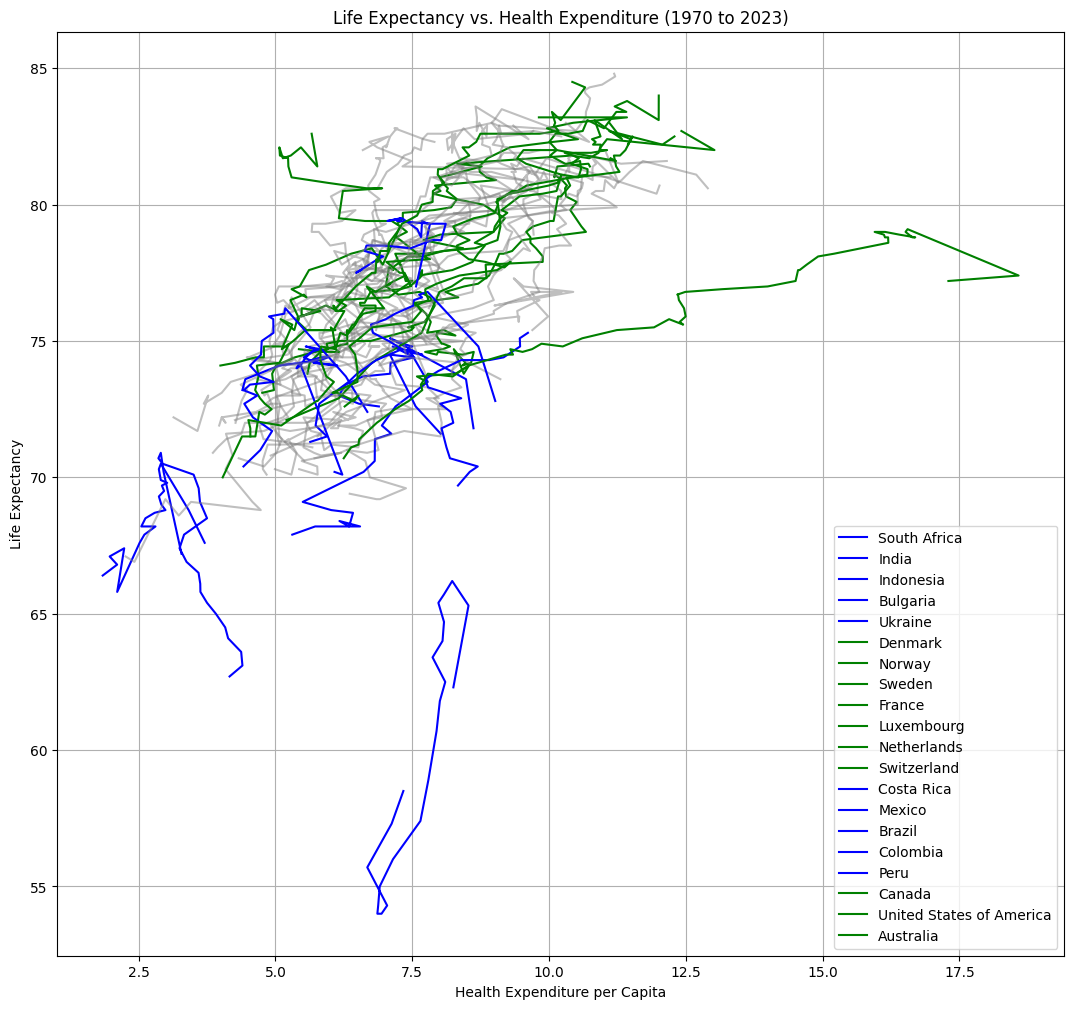

In [141]:
# Initialize the plot
plt.figure(figsize=(13, 12))

# List of countries to highlight
highlight_countries = top_10_countries + bottom_10_countries + ['United States of America']

# Plot data for each country
for country in selected_lexgdphealth_df['Reference Area'].unique():
    country_data = selected_lexgdphealth_df[selected_lexgdphealth_df['Reference Area'] == country]
    if country in highlight_countries:
        if country in top_10_countries:
            plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='green') #, marker='o')
        elif country in bottom_10_countries:
            plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='blue') #, marker='o')
        elif country == 'United States of America':
            plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='red', marker='o')
            for i, row in country_data.iterrows():
                # Annotate every 5 years
                if int(row['Time Period']) % 5 == 0:  # Check if the year is a multiple of 5
                    plt.annotate(row['Time Period'], (row['Health Expenditure'], row['Life Expectancy']), textcoords="offset points", xytext=(0,10), ha='center')
    else:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], alpha=0.5, color='gray')
    
# Set labels and title
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Life Expectancy')
plt.grid()
plt.title('Life Expectancy vs. Health Expenditure (1970 to 2023)')
plt.legend()

# Show the plot
plt.show()

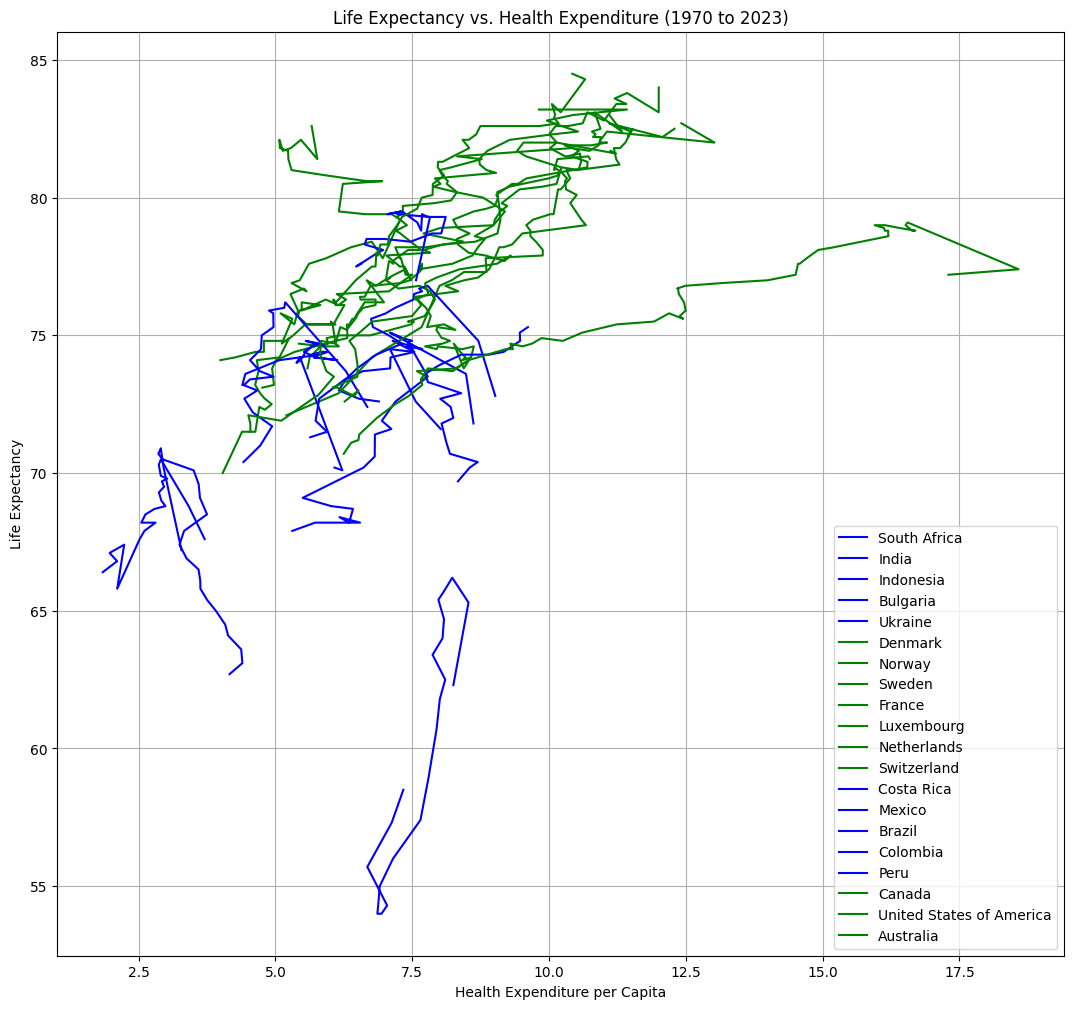

In [142]:
# Initialize the plot
plt.figure(figsize=(13, 12))

# Plot data for each country
for country in selected_lexgdphealth_df['Reference Area'].unique():
    country_data = selected_lexgdphealth_df[selected_lexgdphealth_df['Reference Area'] == country]
    if country in top_10_countries:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='green')
    elif country in bottom_10_countries:
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='blue')
    elif country == 'United States of America':
        plt.plot(country_data['Health Expenditure'], country_data['Life Expectancy'], label=country, color='red', marker='o')
        for i, row in country_data.iterrows():
            # Annotate every 5 years
            if int(row['Time Period']) % 5 == 0:  # Check if the year is a multiple of 5
                plt.annotate(row['Time Period'], (row['Health Expenditure'], row['Life Expectancy']), textcoords="offset points", xytext=(0,10), ha='center')

# Set labels and title
plt.xlabel('Health Expenditure per Capita')
plt.ylabel('Life Expectancy')
plt.grid()
plt.title('Life Expectancy vs. Health Expenditure (1970 to 2023)')

# Show only legend entries for top 10, bottom 10, and United States of America
handles, labels = plt.gca().get_legend_handles_labels()
to_display = top_10_countries + bottom_10_countries + ['United States of America']
filtered_handles = [h for h, l in zip(handles, labels) if l in to_display]
filtered_labels = [l for l in labels if l in to_display]
plt.legend(filtered_handles, filtered_labels)

# Show the plot
plt.show()